# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


# 1. Ogólny przegląd danych

In [3]:
df.sample(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
543,2.0,0.0,"Reeves, Mr. David",male,36.0,0.0,0.0,C.A. 17248,10.5000,NaN,S,NaN,NaN,"Brighton, Sussex"
929,3.0,0.0,"Kiernan, Mr. John",male,NaN,1.0,0.0,367227,7.7500,NaN,Q,NaN,NaN,NaN
895,3.0,1.0,"Johnson, Miss. Eleanor Ileen",female,1.0,1.0,1.0,347742,11.1333,NaN,S,15,NaN,NaN
281,1.0,1.0,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1.0,0.0,11778,55.4417,C116,C,5,NaN,"Newark, NJ"
833,3.0,0.0,"Green, Mr. George Henry",male,51.0,0.0,0.0,21440,8.0500,NaN,S,NaN,NaN,"Dorking, Surrey, England"
991,3.0,1.0,"Mamee, Mr. Hanna",male,NaN,0.0,0.0,2677,7.2292,NaN,C,15,NaN,NaN
127,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,D,NaN,"Scituate, MA"
676,3.0,0.0,"Bjorklund, Mr. Ernst Herbert",male,18.0,0.0,0.0,347090,7.7500,NaN,S,NaN,NaN,"Stockholm, Sweden New York"
363,2.0,0.0,"Campbell, Mr. William",male,NaN,0.0,0.0,239853,0.0000,NaN,S,NaN,NaN,Belfast
578,2.0,0.0,"Ware, Mr. John James",male,30.0,1.0,0.0,CA 31352,21.0000,NaN,S,NaN,NaN,"Bristol, England / New Britain, CT"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

## Wnioski
1. Plik składa się ze **1310** rekordów i **14** kolumn.
2. Pasażerowie byli młodzi: średnia wieku 29, powyżej 75% 39 lat, a poniżej 25% 21 lat
3. Mamy 3 kategorie biletów
4. Odnaleziono tylko 121 ciał
5. Było tylko 27 łodzi
6. Było duże zróżnicowanie cen biletów **fare** aż 281


# 2. Analiza brakujących wartości

In [7]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [8]:
df.isnull().sum()#Sprawdzanie brakujących wartości w kolumnach

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

## Wnioski
1. Najwięcej brakujących danych dotyczy kolejno:
   - body      - 1189
   - cabin     - 1015
   - boat      - 824
   - home.dest - 565
   - age       - 264


# 3. Transformacja danych

In [9]:
df['body'].fillna('Unknown', inplace=True)

In [10]:
df['cabin'].fillna('Unknown', inplace=True)

In [11]:
df['boat'].fillna('Unknown', inplace=True)

In [12]:
df['home.dest'].fillna(df['home.dest'].mode()[0], inplace=True)

In [13]:
df['age'].fillna(df['age'].median(), inplace=True)

In [14]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [15]:
df['fare'].fillna(df['fare'].median(), inplace=True)

In [16]:
df.isnull().sum()

pclass       1
survived     1
name         1
sex          1
age          0
sibsp        1
parch        1
ticket       1
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

## Wnioski
1. Większość brakujących danych uzupełnione zostało wartością "Unknown" poza wiekiem **age** i ceną biletu **fare**, który został uzupełniony medianą
   

# 4. Analiza pojedyńczych zmiennych

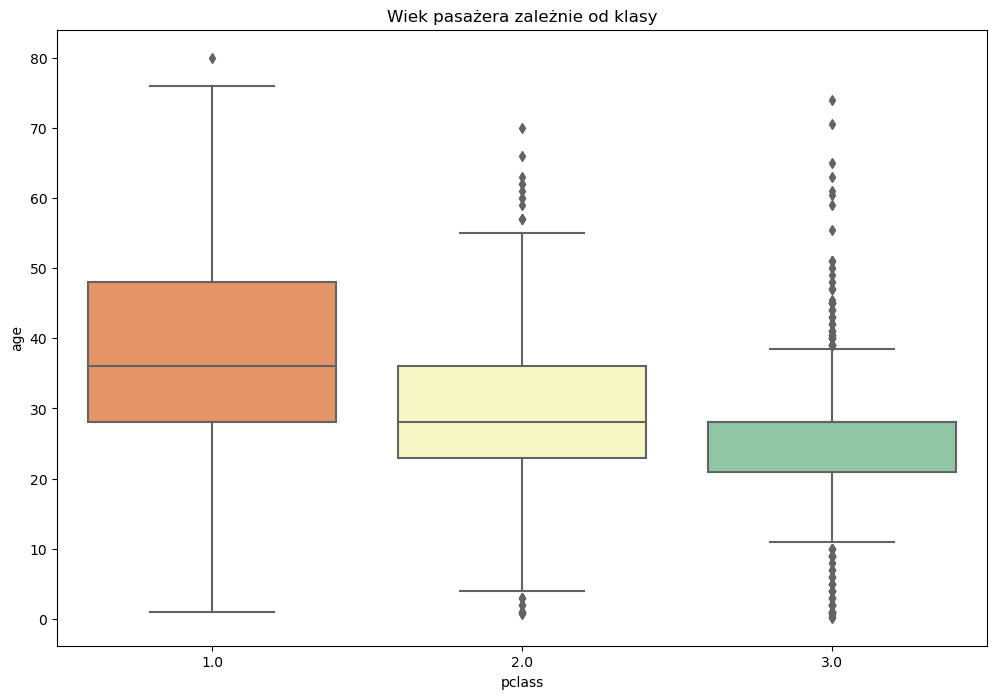

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='pclass', y='age', data=df, palette='Spectral')
plt.title('Wiek pasażera zależnie od klasy')
plt.show()

## Wnioski
1. Mediana dla kalsy 1 to 39 lat
2. Dla klasy 2 to 28 lat
3. Dla klasy 3 to 24 lata

Starszy pasażer to często lepsze zarobki(lepszy status materialny) pozwalajacy na zakup biletów w wyższej klasie

<Axes: xlabel='age', ylabel='Count'>

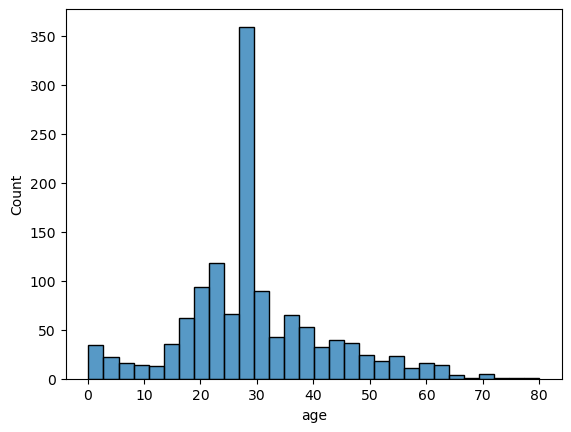

In [48]:
sns.histplot(df['age'].dropna(), bins=30)


<Axes: >

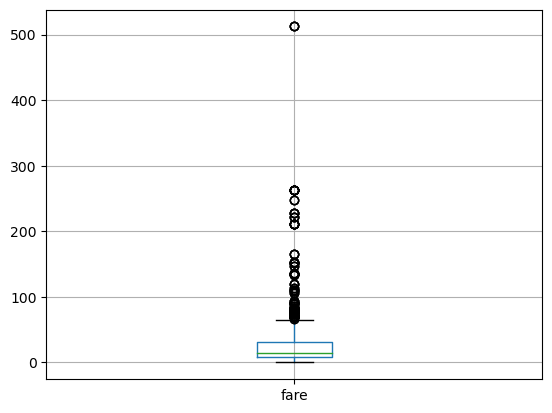

In [19]:
df.boxplot(column='fare')

## Wnioski
Bardzo duży rozrzut cenowy biletów

In [20]:
df['survived'].value_counts(normalize=True) # Ile przeżyło


0.0    0.618029
1.0    0.381971
Name: survived, dtype: float64

<Axes: xlabel='survived', ylabel='count'>

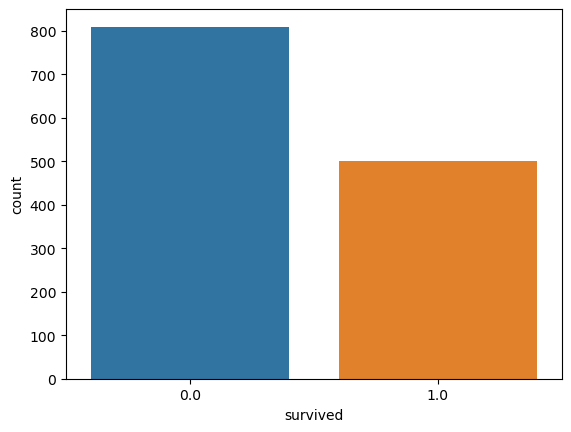

In [21]:
sns.countplot(x='survived', data=df) # Ile przeżyło


<Axes: xlabel='pclass', ylabel='survived'>

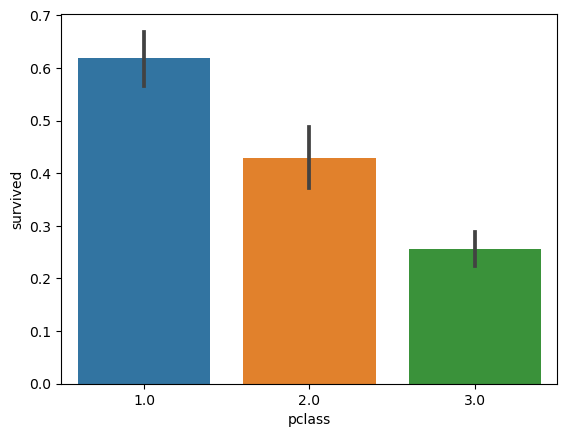

In [22]:
sns.barplot(x='pclass', y='survived', data=df) # Klasa biletu a przeżywalność


## Wnioski
Posiadanie biletu w klasie 1 gwarantowała większą przeżywalność. Generalnie im wyższa klasa biletu tym wyższa przeżywalność

<Axes: xlabel='sex', ylabel='survived'>

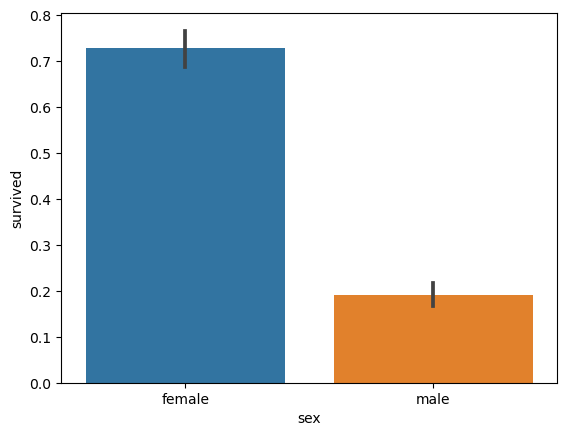

In [23]:
sns.barplot(x='sex', y='survived', data=df) # Szanse na przeżycie zależnie od płci


## Wnioski
Kobiety miały większe szanse na przeżycie co stanowi ok. 74% wszystkich pasażerów

<Axes: xlabel='sibsp', ylabel='survived'>

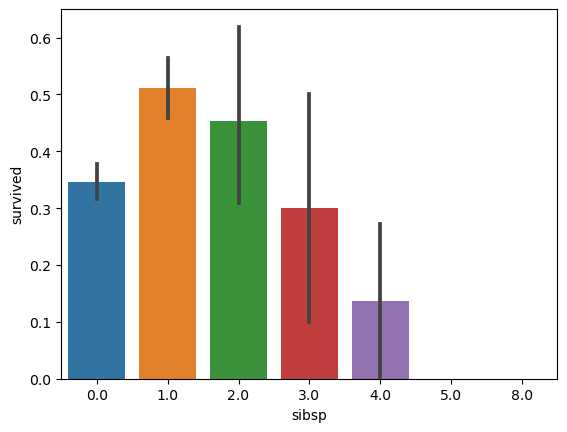

In [24]:
sns.barplot(x='sibsp', y='survived', data=df)

## Wnioski
Posiadanie 1 rodzeństwa znacznie zwiększało szanse przeżycie, ale posiadanie już 2, 3 czy 4 osób nie pomagało w tym

<Axes: xlabel='survived', ylabel='age'>

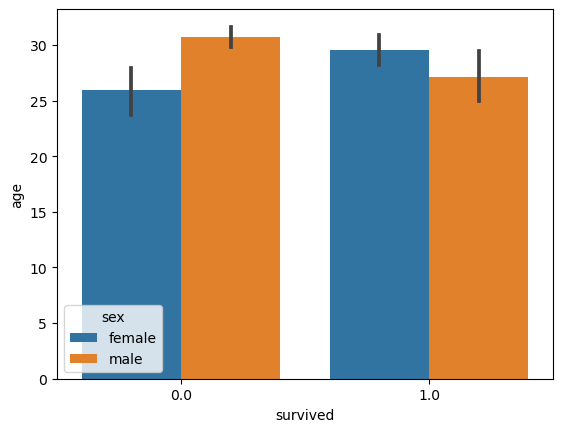

In [35]:
sns.barplot(x='survived', y='age',hue='sex', data=df)

## Wnioski
Średnia wieku dla mężczyzn którzy nie przeżyli była wyższa niż dla kobiet z tej samej grupy, odwrotnie ma sie rzecz dla kobiet i mężczyzn którzy przeżyli

<Axes: xlabel='survived', ylabel='fare'>

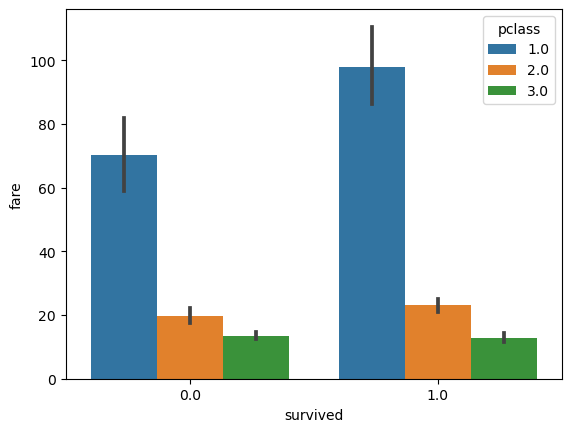

In [47]:
sns.barplot(x='survived', y='fare', hue='pclass', data=df) # Szanse na przeżycie zależnie od ceny biletu i klasy biletu


## Wnioski
Przeżywalnośc wzrastała wraz z ceną i klasą biletu, czego nie można powiedzieć o klasie 3 biletu

<Axes: xlabel='embarked', ylabel='survived'>

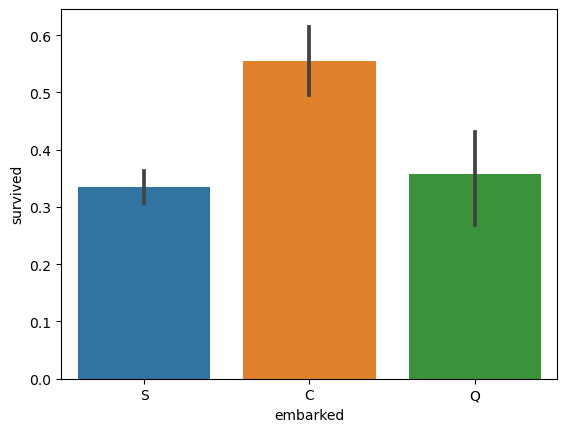

In [46]:
sns.barplot(x='embarked', y='survived', data=df)

## Wnioski
Największa przeżywalnośc była wśród pasażerów, którzy weszli na pokład w C-Cherbourg

<Axes: xlabel='FamilySize', ylabel='survived'>

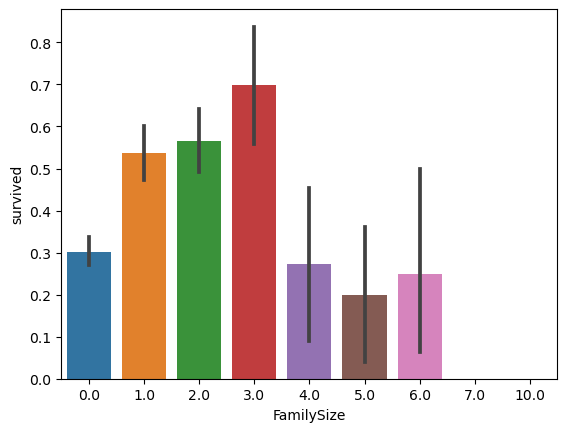

In [50]:
df['FamilySize'] = df['sibsp'] + df['parch'] 
sns.barplot(x='FamilySize', y='survived', data=df)


## Wnioski
Rodziny 3 osobowe miały największe szanse na przeżycie. Wzrost liczby osób w rodzinie do 4-6 znacznie zmniejszał na szanse przeżycia rodziny.

# 5. Analiza relacji między zmiennymi

In [26]:
df.corr(numeric_only=True)

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.377908,0.060832,0.018322,-0.558683
survived,-0.312469,1.000000,-0.043818,-0.027825,0.082660,0.244414
age,-0.377908,-0.043818,1.000000,-0.189972,-0.125851,0.178204
sibsp,0.060832,-0.027825,-0.189972,1.000000,0.373587,0.160349
parch,0.018322,0.082660,-0.125851,0.373587,1.000000,0.221635
fare,-0.558683,0.244414,0.178204,0.160349,0.221635,1.000000


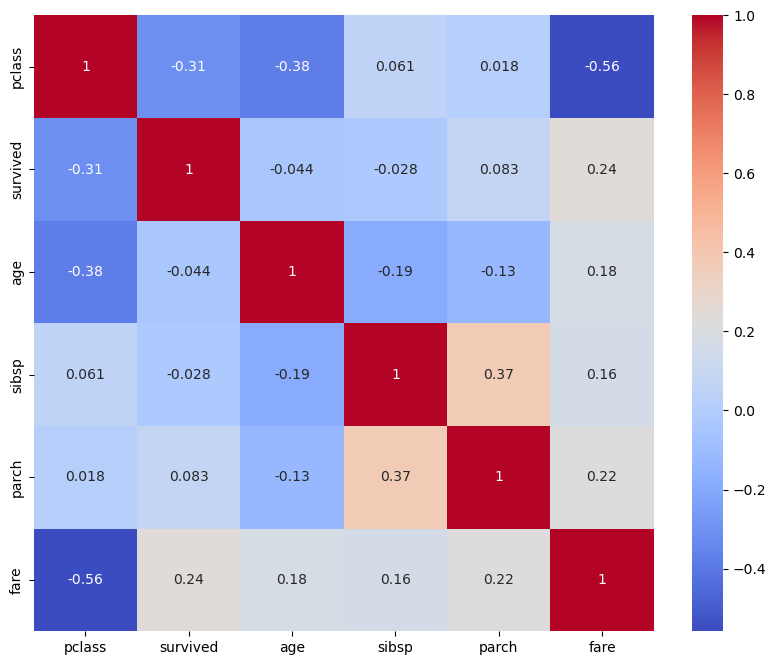

In [27]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png')

## Wnioski
1. Nie ma specjalnie widocznej korelacji pomiędzy zmiennymi
2. Jedną zauważalna ujemną korelacją dość oczywistą jest klasa biletu i jego cena:
   - **Im niższa klasa(pclass) tym niższa cena biletu(fare) choć w tym przypadku cena winna być jeszcze niższa wraz ze spadkiem klasy wskaźnik -0,56**
   

# 6. Analiza wartości odstających

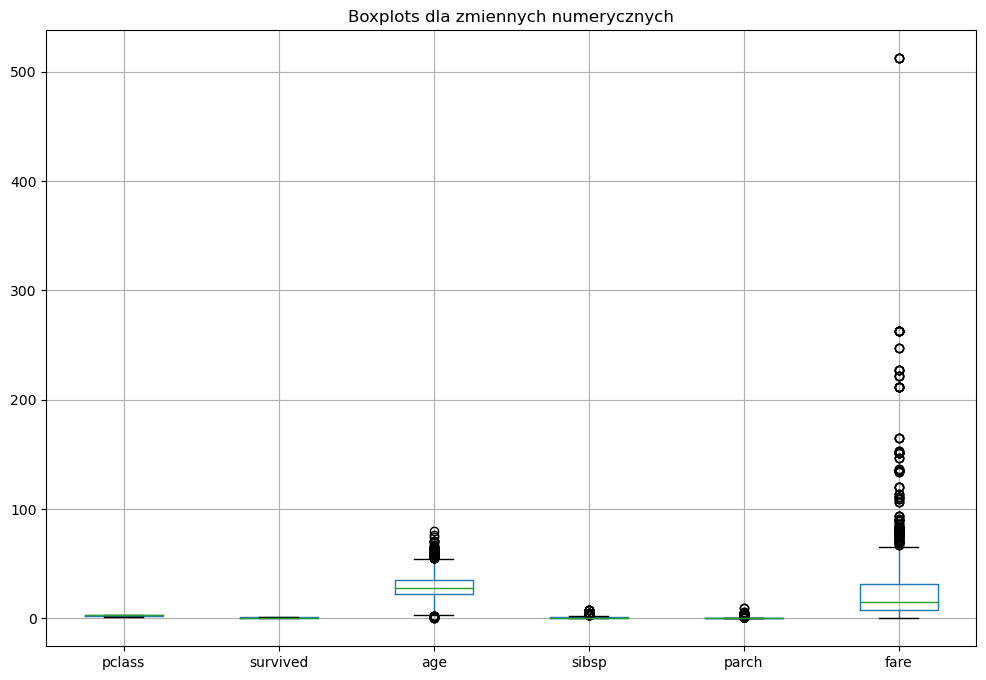

In [28]:
# 1. Wybranie kolumn numerycznych do stworzenia boxplotów
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# 2. Tworzenie boxplotów dla wszystkich wybranych kolumn
plt.figure(figsize=(12, 8))
df.boxplot(column=numeric_cols)
plt.title('Boxplots dla zmiennych numerycznych')
plt.show()

## Wnioski
Wiele wartości odstających jest dla:
- **age** - wiek
- **fare**- cena biletu
- **sibsp** - liczba rodzeństwa/małżonków na pokładzie
- **parch** - liczba rodziców/dzieci na pokładzie

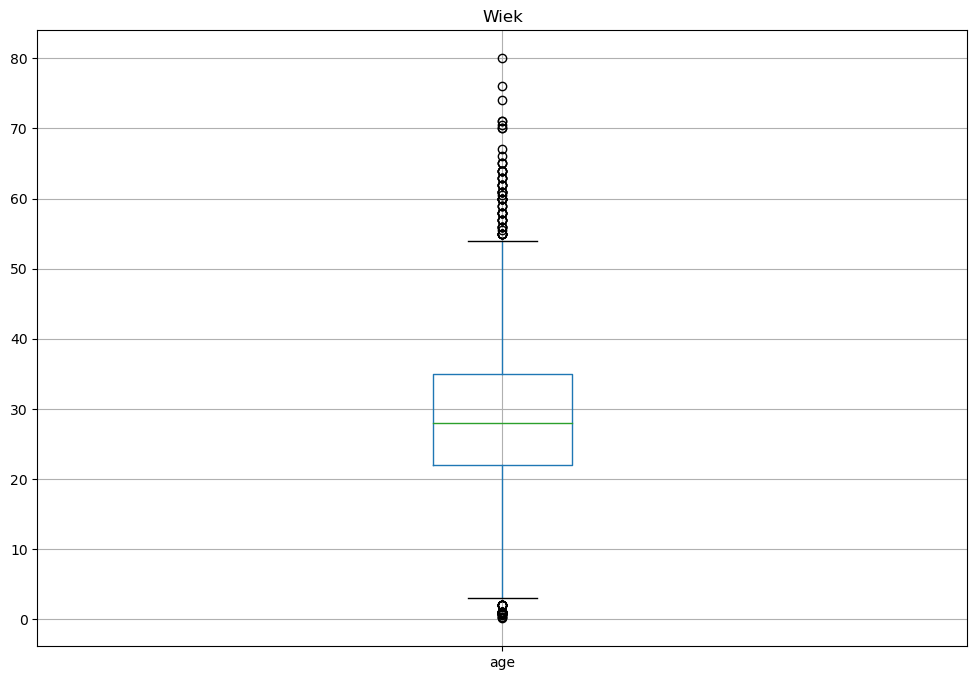

In [29]:
plt.figure(figsize=(12, 8))
df.boxplot(column='age')
plt.title('Wiek')
plt.show()

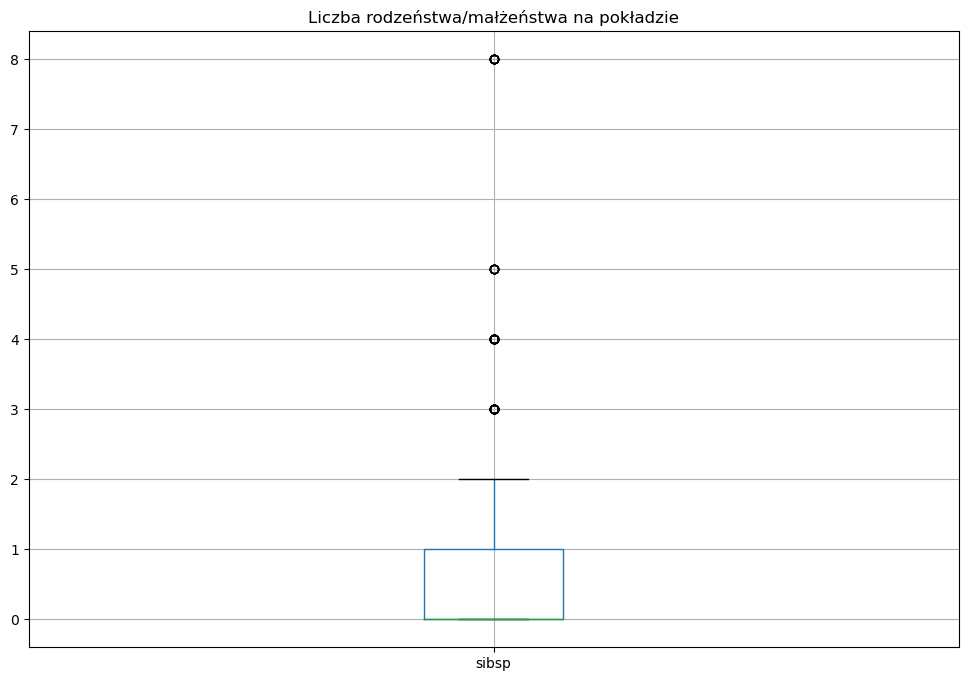

In [30]:
plt.figure(figsize=(12, 8))
df.boxplot(column='sibsp')
plt.title('Liczba rodzeństwa/małżeństwa na pokładzie')
plt.show()

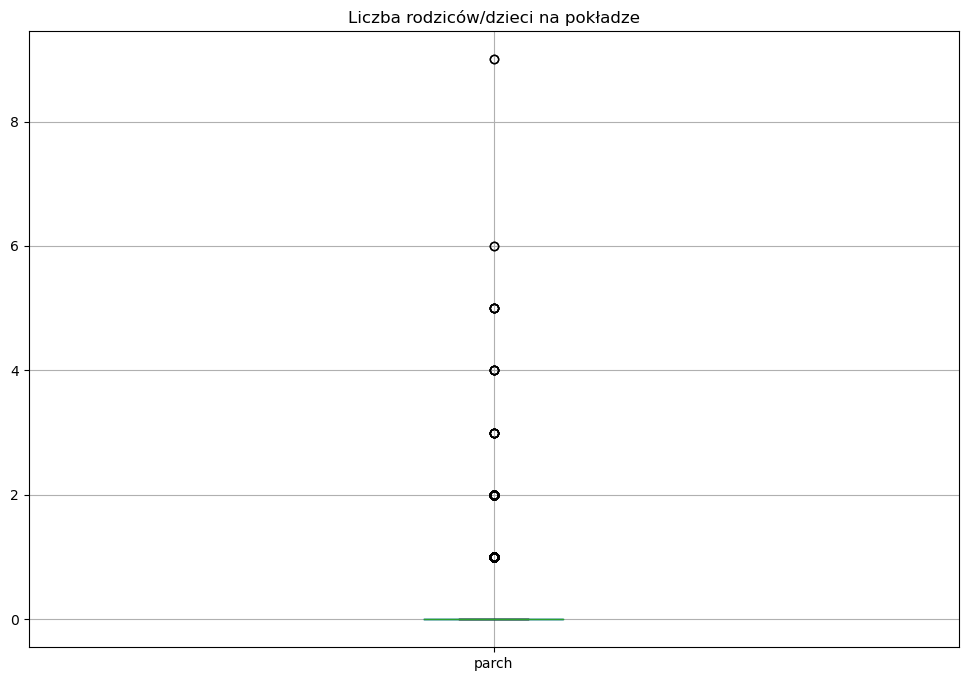

In [31]:
plt.figure(figsize=(12, 8))
df.boxplot(column='parch')
plt.title('Liczba rodziców/dzieci na pokładze')
plt.show()

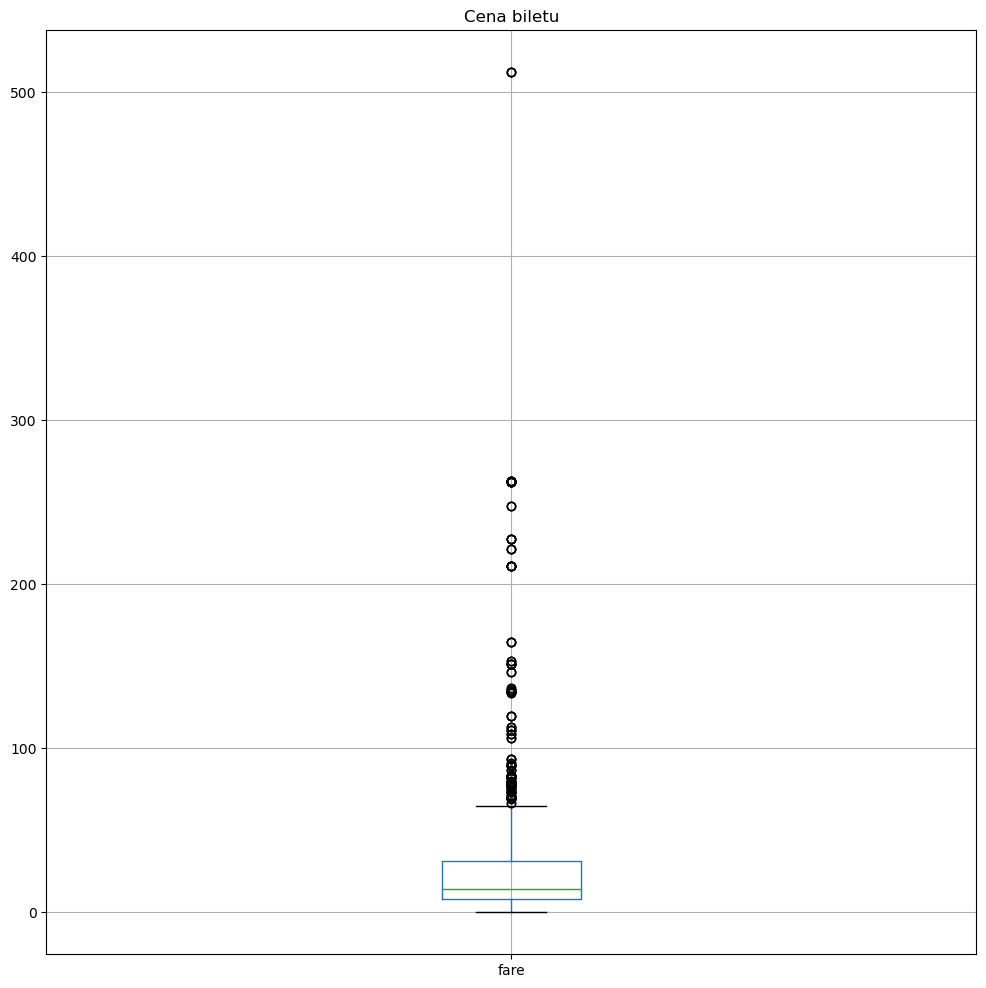

In [32]:
plt.figure(figsize=(12, 12))
df.boxplot(column='fare')
plt.title('Cena biletu')
plt.show()

# 6. Wnioski końcowe i konkluzje



- Wiek: Większość pasażerów była dorosła, ale występowały też dzieci. 
    <br>Dominowały osoby młode, być może bardziej otwarte na nowe wydarzenia i nowości czym był rejs Titanica,
    <br>Zdecydowana większość pasażerów była w wieku około 30 lat.
- Klasa: Pasażerowie pierwszej klasy mieli większe szanse na przeżycie.
    <br>Zakup droższego biletu w najlepszej klasie gwarantuje większy komfort, ale jak sie okazuje zwiększa także szanse na przeżycie,
- FamilySize: Zbyt duża rodzina nie gwarantowała przeżycia ale wsparcie choć jednej osoby juz tak.

    




